# Face API Sample

face api는 인물 분석을 통해서 다양한 정보를 제공해 줍니다. Azure Portal에서 Face API를 먼저 생성하고 접속에 필요한 URL과 subscription key를 가져와서 보여 줍니다.

관련된 라이브러리를 가져옵니다. request는 웹 통신을 위해서 가져오고 BytesIO, Image는 이미지를 처리하기 위해서 사용하고 있습니다. ImageDraw, ImageFont는 이미지 위에 선을 긋거나 글씨를 넣기 위해서 사용됩니다.

In [75]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

Subscription Key와 서비스의 주소를 설정합니다.

In [76]:
Subscription_key='cfed609ad3ef4031bb274bb3e808e302'

In [77]:
faceDetection_url = 'https://facedetect00.cognitiveservices.azure.com/face/v1.0/detect'

분석에 사용할 이미지를 확인합니다.

In [78]:
image_url = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2F0.soompi.io%2Fwp-content%2Fuploads%2F2018%2F01%2F25005258%2FOh-My-Girl7.jpg&f=1&nofb=1'

In [79]:
img = Image.open(BytesIO(requests.get(image_url).content))

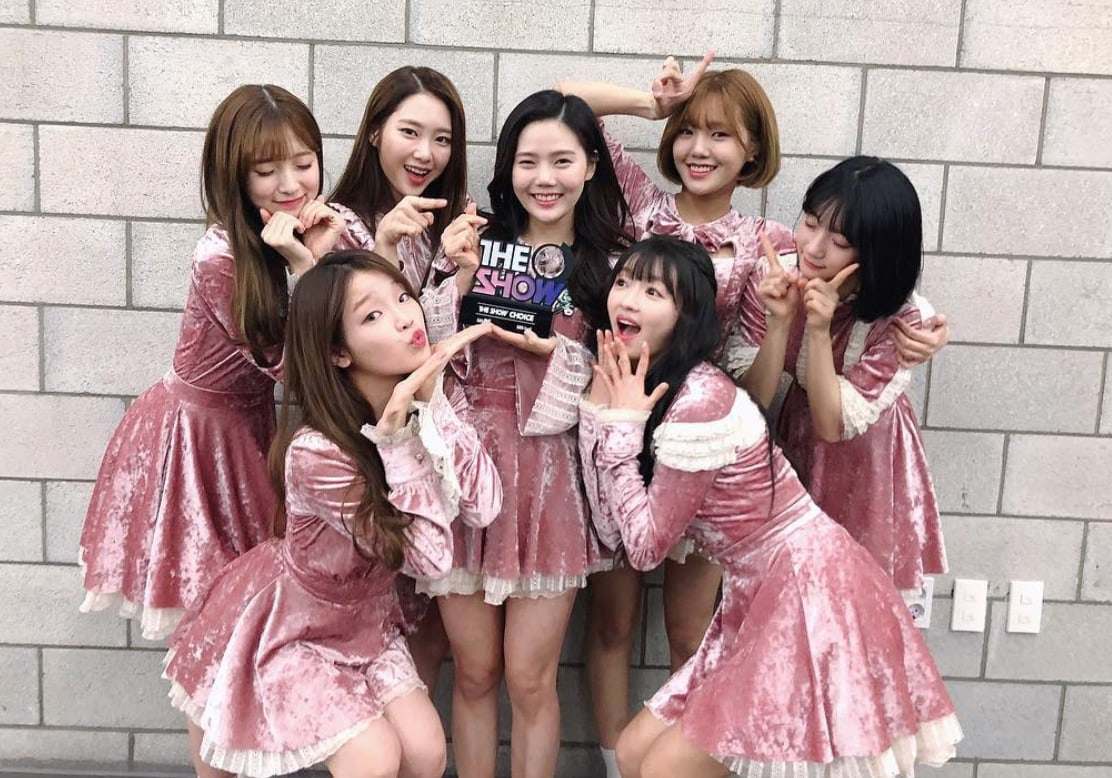

In [80]:
img

In [81]:
headers = {'Ocp-Apim-Subscription-key': Subscription_key}
params = {
    'returnFaceID':'true',
    'returnFaceAttributes':'age,gender,emotion'
}

In [82]:
data = {'url':image_url}

서비스를 호출해서 결과를 확인 합니다.

In [83]:
response = requests.post(faceDetection_url,
                       headers=headers,
                       params=params,
                       json=data)

In [84]:
faces = response.json()

In [85]:
faces

[{'faceId': '08b1f41d-8419-44cb-bb53-18951871bca1',
  'faceRectangle': {'top': 211, 'left': 777, 'width': 78, 'height': 78},
  'faceAttributes': {'gender': 'female',
   'age': 18.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.001,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.459,
    'neutral': 0.528,
    'sadness': 0.012,
    'surprise': 0.0}}},
 {'faceId': '1296e672-586d-4658-8b65-15912ee39aa4',
  'faceRectangle': {'top': 266, 'left': 593, 'width': 77, 'height': 77},
  'faceAttributes': {'gender': 'female',
   'age': 20.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.554,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.445}}},
 {'faceId': 'b7c81f41-a9ef-4e75-baa1-fc3ce0af5065',
  'faceRectangle': {'top': 140, 'left': 508, 'width': 75, 'height': 75},
  'faceAttributes': {'gender': 'female',
   'age': 23.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happ

In [86]:
draw = ImageDraw.Draw(img)

In [87]:
for face in faces:
    
    rect = face['faceRectangle']
    
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']
    
    draw.rectangle(((left,top),(left+width,top+height)), outline='red')
    
    face_info = face['faceAttributes']
    emotion = face_info['emotion']
    happiness=emotion['happiness']
    gender = face_info['gender']
    result = 'Gender: '+ gender + ' happiness: ' + str(happiness)
    
    draw.text((left, top), result, fill='red')

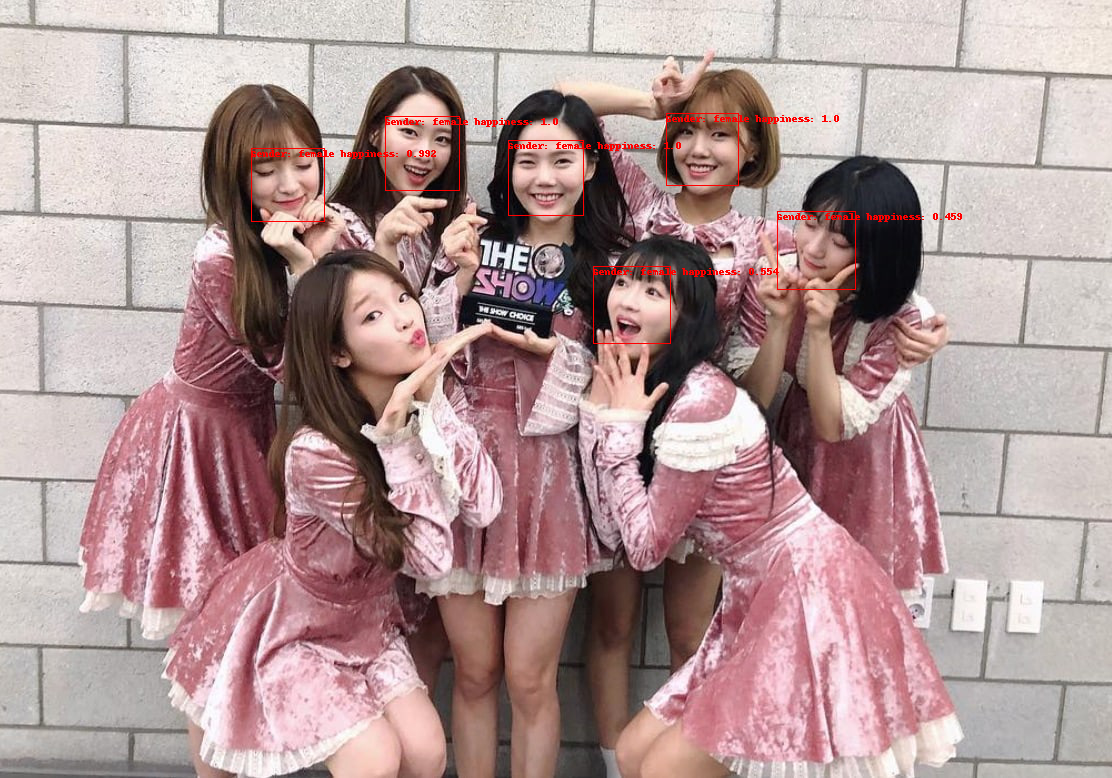

In [88]:
img